# Exploring Terrorism Worldwide
---
### Matt Speck

# Overview of Data
---

#### Details of terror attacks from 1970 through 2015

#### Includes specifics on locations, perpetrators, victims, and the incident (eg. attack type)

#### We'll be looking mostly at attack types and number of attacks

In [12]:
from datetime import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from randomfunctions import print_cols

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
df = pd.read_csv('/Users/mattspeck/Desktop/proj_4_data/original_data/globalterrorismdb_0616.csv',
                 low_memory=False, skipinitialspace=True)

In [4]:
#Create datafram without 0s for month and day
df2 = pd.DataFrame(df[(df['imonth'] != 0) & (df['iday'] != 0)])

In [5]:
del df

In [6]:
df2.reset_index(inplace=True)

In [7]:
df2.drop('index',inplace=True,axis=1)

In [8]:
df2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
1,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
3,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
4,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [9]:
df2['date']= df2.apply(lambda x:dt.strptime("{0} {1} {2}".format(x['iyear'],
                                                                 x['imonth'],
                                                                 x['iday']),
                                            "%Y %m %d"),axis=1)

In [10]:
df2.shape

(155878, 138)

In [11]:
df2.drop(['iyear','imonth','iday'], axis=1, inplace=True)

In [14]:
#Add back year and month columns
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month

In [15]:
#Day with most attacks was June 14, 2014 (96 attacks)
df2['date'].describe()

count                  155878
unique                  15334
top       2014-06-14 00:00:00
freq                       96
first     1970-01-01 00:00:00
last      2015-12-31 00:00:00
Name: date, dtype: object

In [16]:
df2.attacktype1_txt.unique()

array(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking', 'Unknown',
       'Hostage Taking (Kidnapping)', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [17]:
#Creating dictionary of dataframes that contain only entries based on attack type 1
attack_dfs = {}
for i in df2.attacktype1_txt.unique():
    attack_dfs[i] = df2[df2.attacktype1_txt == i].sort_values('date')
    attack_dfs[i].reset_index(inplace=True)
    attack_dfs[i].drop('index',axis=1,inplace=True)

# How Do Attacks Vary Over Time?

In [25]:
sns.set_style('whitegrid')

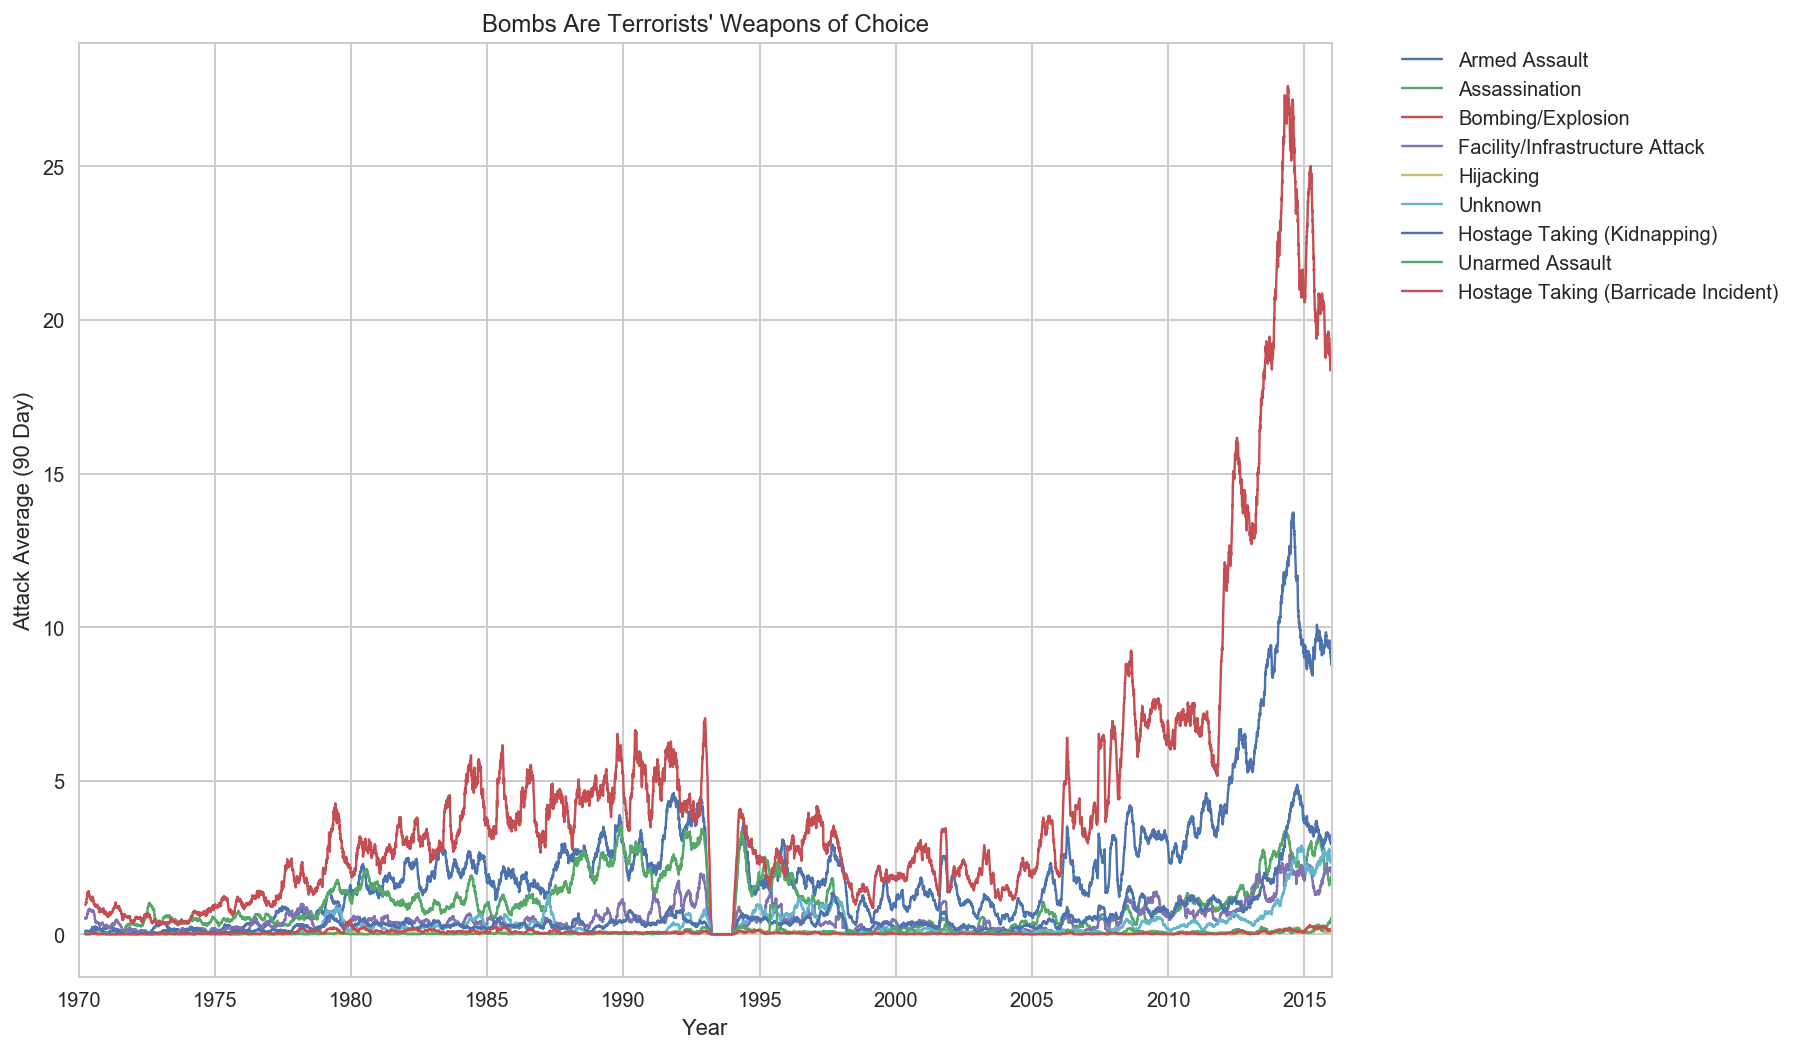

In [27]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 22
#plt.style.use('retina')
idx = pd.date_range('01-01-1970', '12-31-2015')
for i in df2.attacktype1_txt.unique():
    attack_dfs[i]['date'].value_counts().sort_index().reindex(idx, fill_value=0).loc[pd.to_datetime('1970-01-01'):pd.to_datetime('2015-12-31')].rolling(window=90).mean().plot(label=i, linewidth=1.2)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Bombs Are Terrorists\' Weapons of Choice')
plt.xlabel('Year')
plt.ylabel('Attack Average (90 Day)')
plt.show()

In [100]:
df2.attacktype1_txt.value_counts()

Bombing/Explosion                      75638
Armed Assault                          37433
Assassination                          17460
Hostage Taking (Kidnapping)             8971
Facility/Infrastructure Attack          8768
Unknown                                 5407
Hostage Taking (Barricade Incident)      829
Unarmed Assault                          820
Hijacking                                552
Name: attacktype1_txt, dtype: int64

In [28]:
attacks = df2.attacktype1_txt.unique()

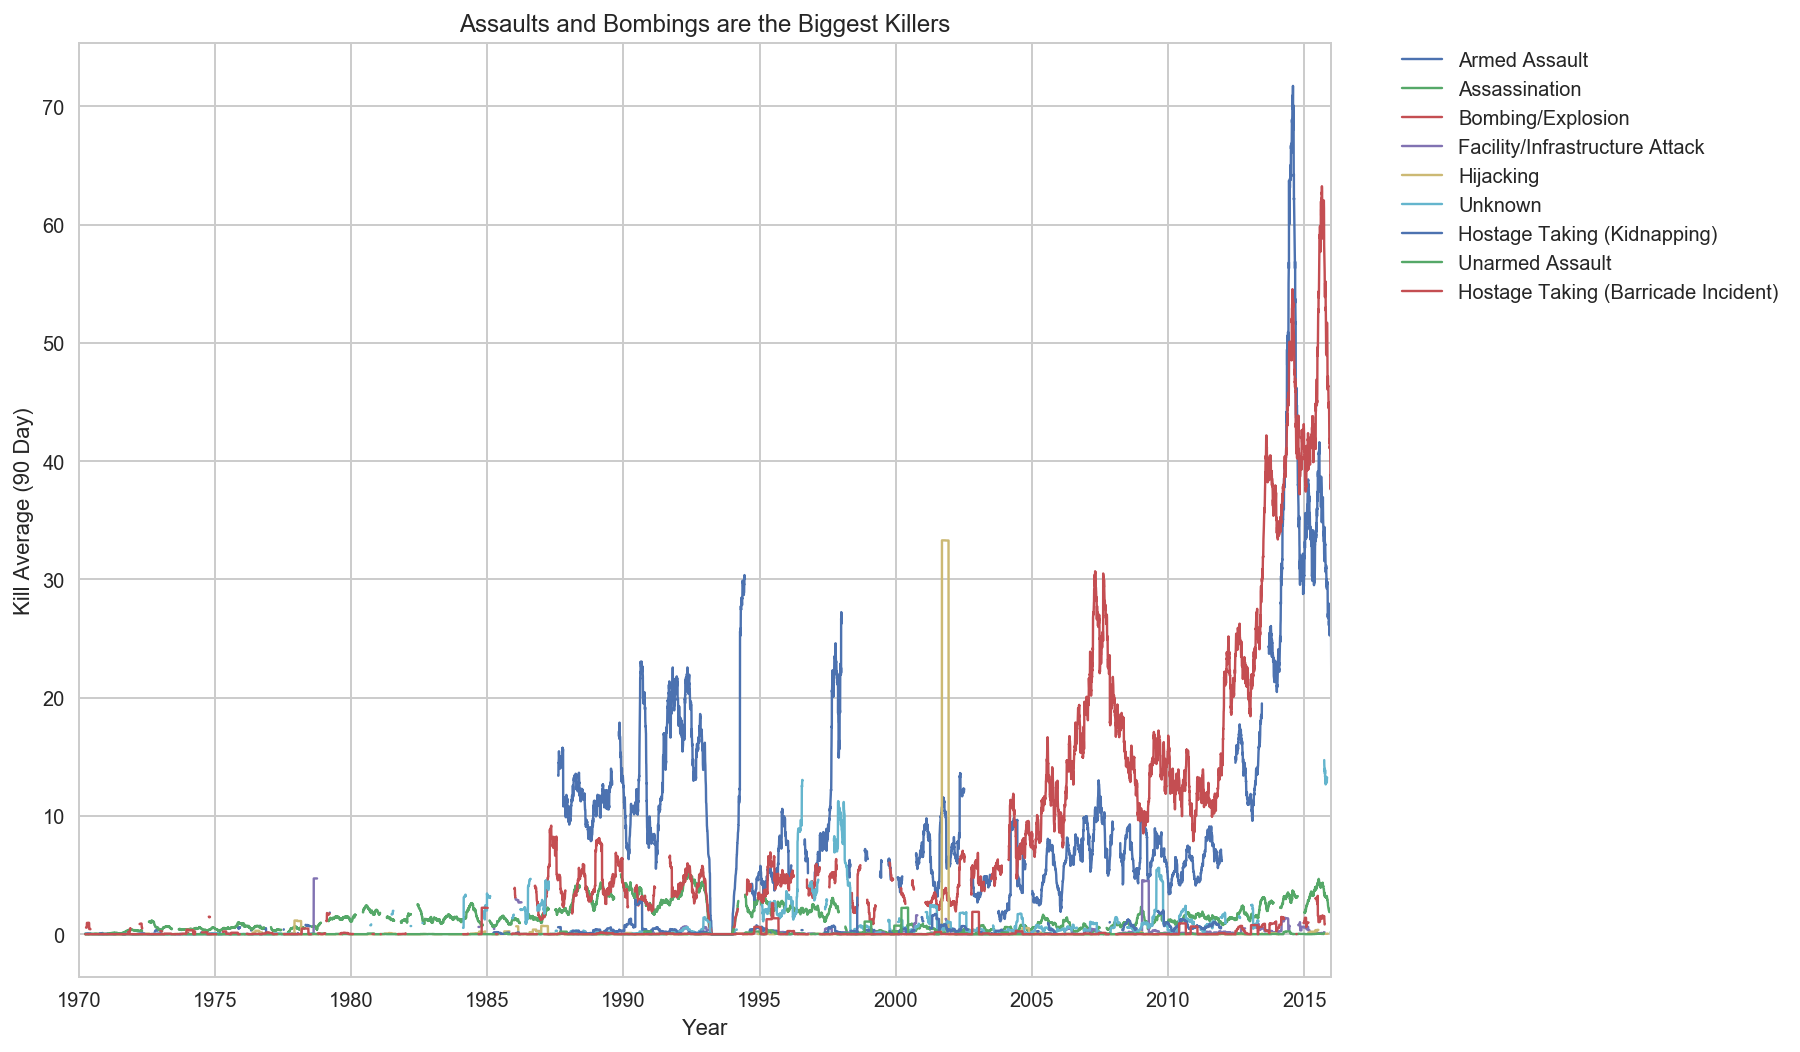

In [29]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
#plt.style.use('fivethirtyeight')
idx = pd.date_range('01-01-1970', '12-31-2015')
for i in attacks:
    attack_dfs[i].groupby('date').nkill.sum().sort_index().reindex(idx, fill_value=0).loc[pd.to_datetime('1970-01-01'):pd.to_datetime('2015-12-31')].rolling(window=90).mean().plot(label=i, linewidth=1.2)
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Assaults and Bombings are the Biggest Killers')
plt.xlabel('Year')
plt.ylabel('Kill Average (90 Day)')
plt.show()

The large yellow spike above is the September 11th terrorist attack.

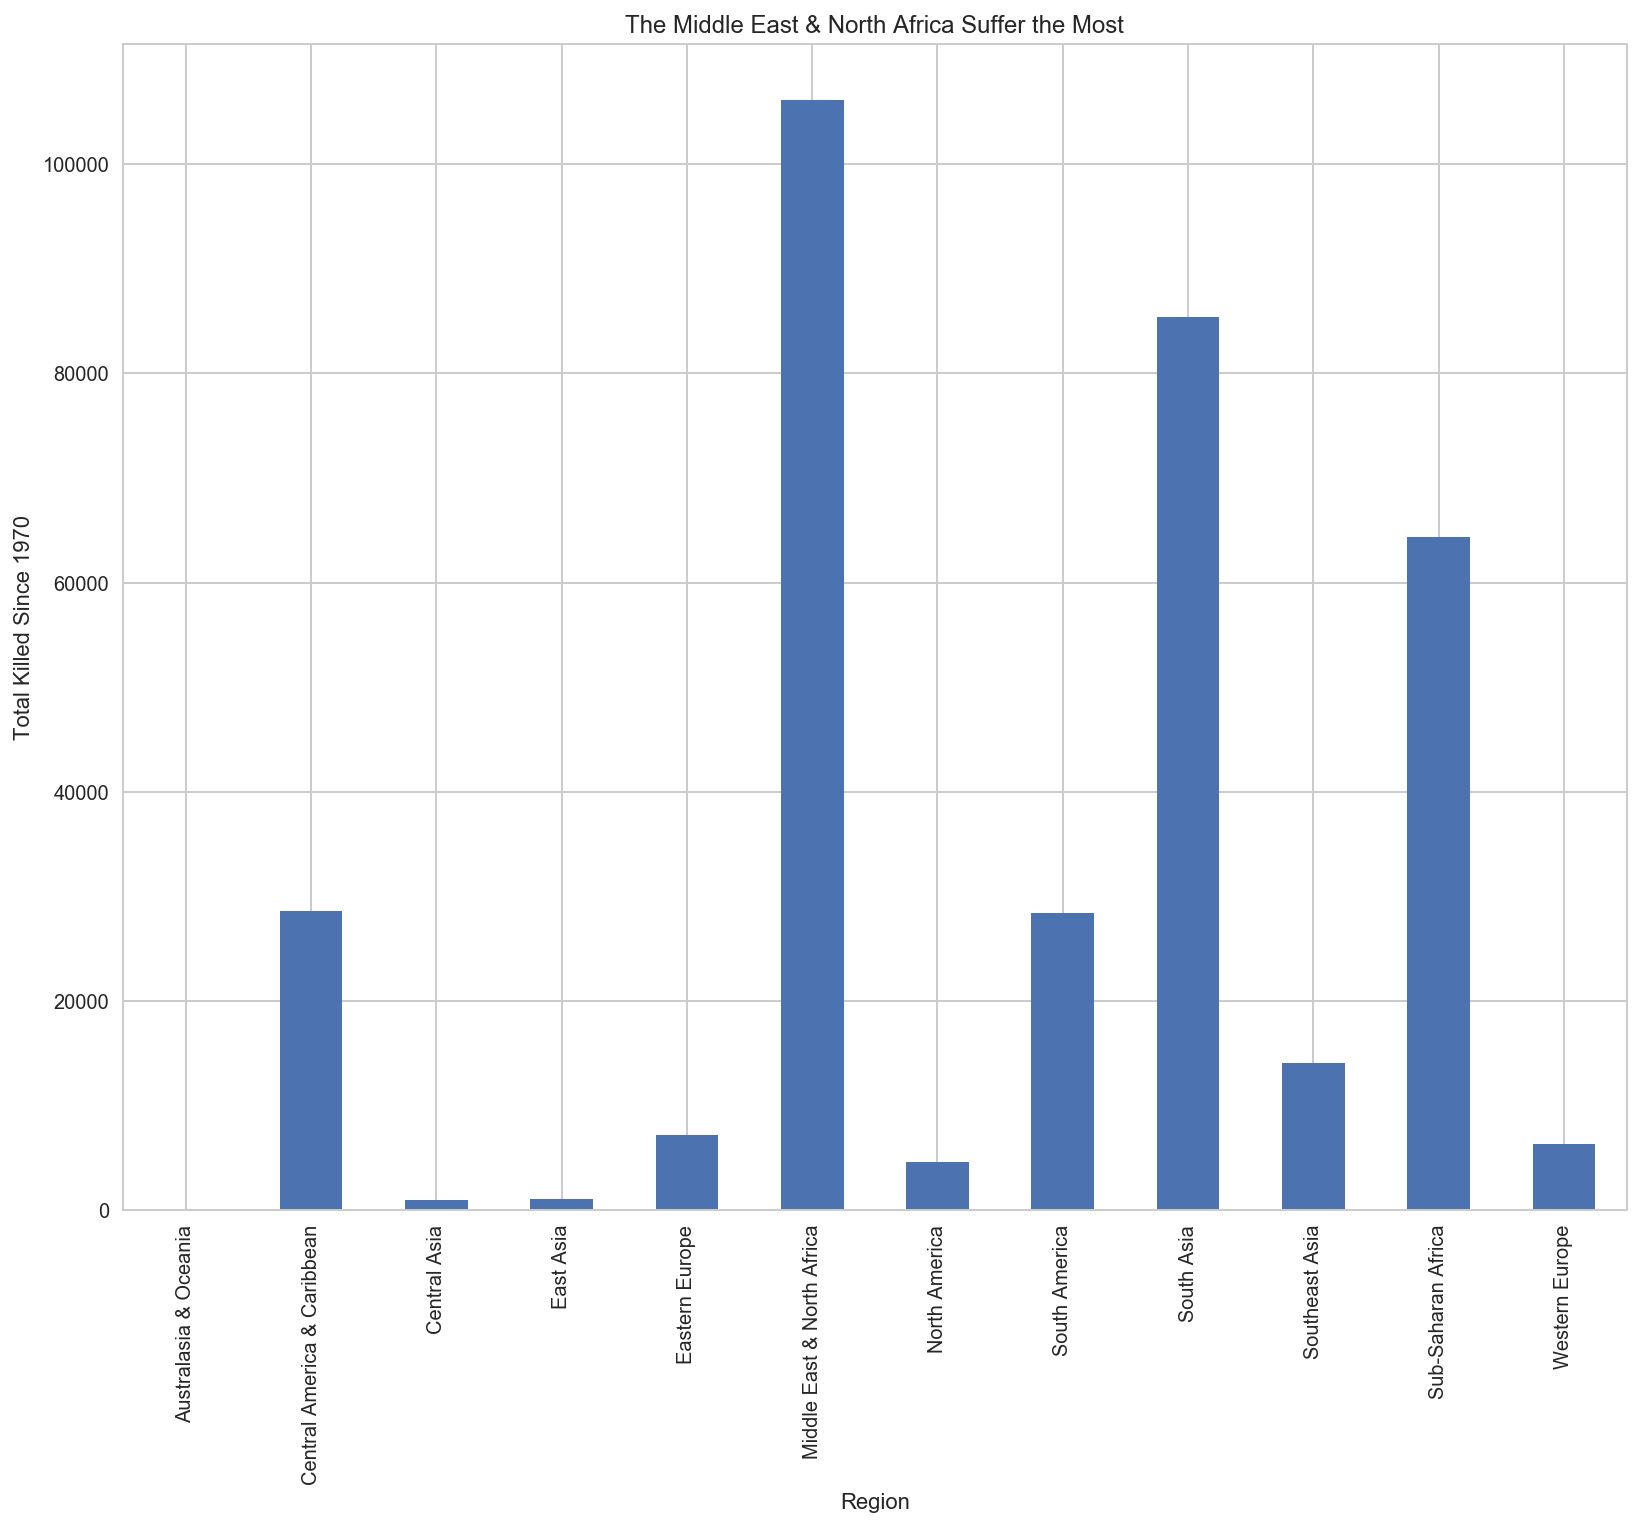

In [30]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 17
#plt.style.use('fivethirtyeight')
df2.groupby('region_txt').nkill.sum().plot(kind='bar')
plt.title('The Middle East & North Africa Suffer the Most')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()

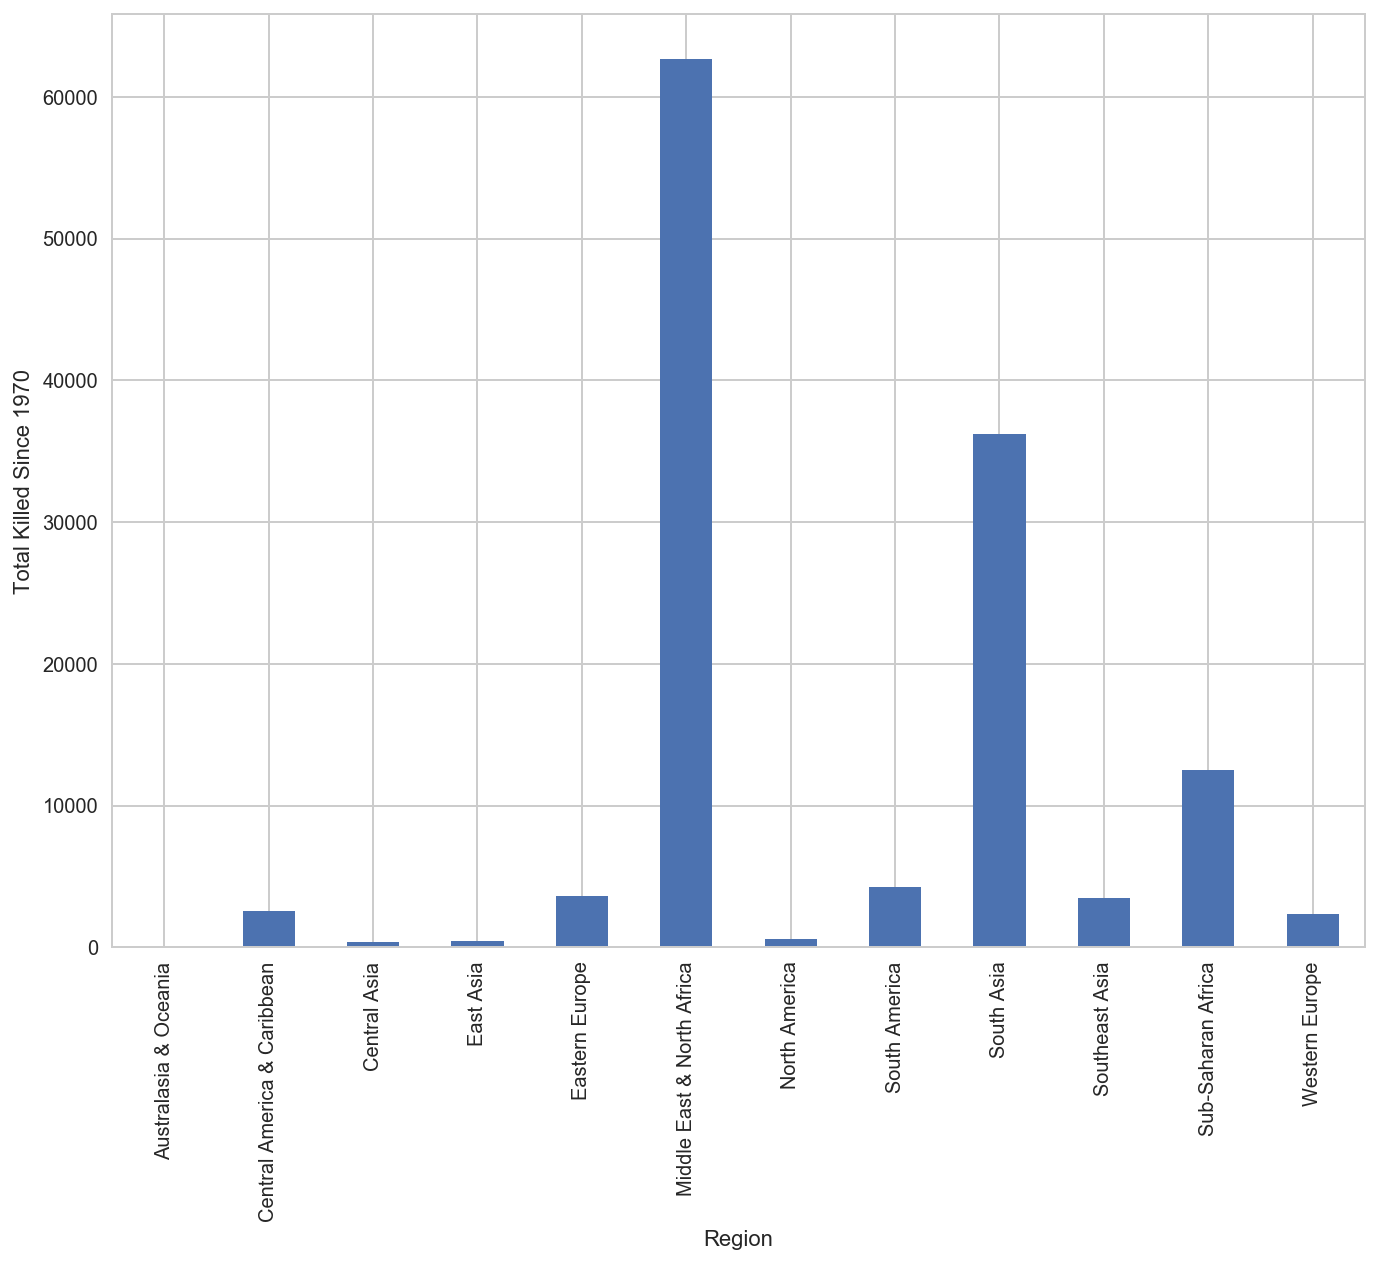

In [31]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 17
attack_dfs['Bombing/Explosion'].groupby('region_txt').nkill.sum().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()

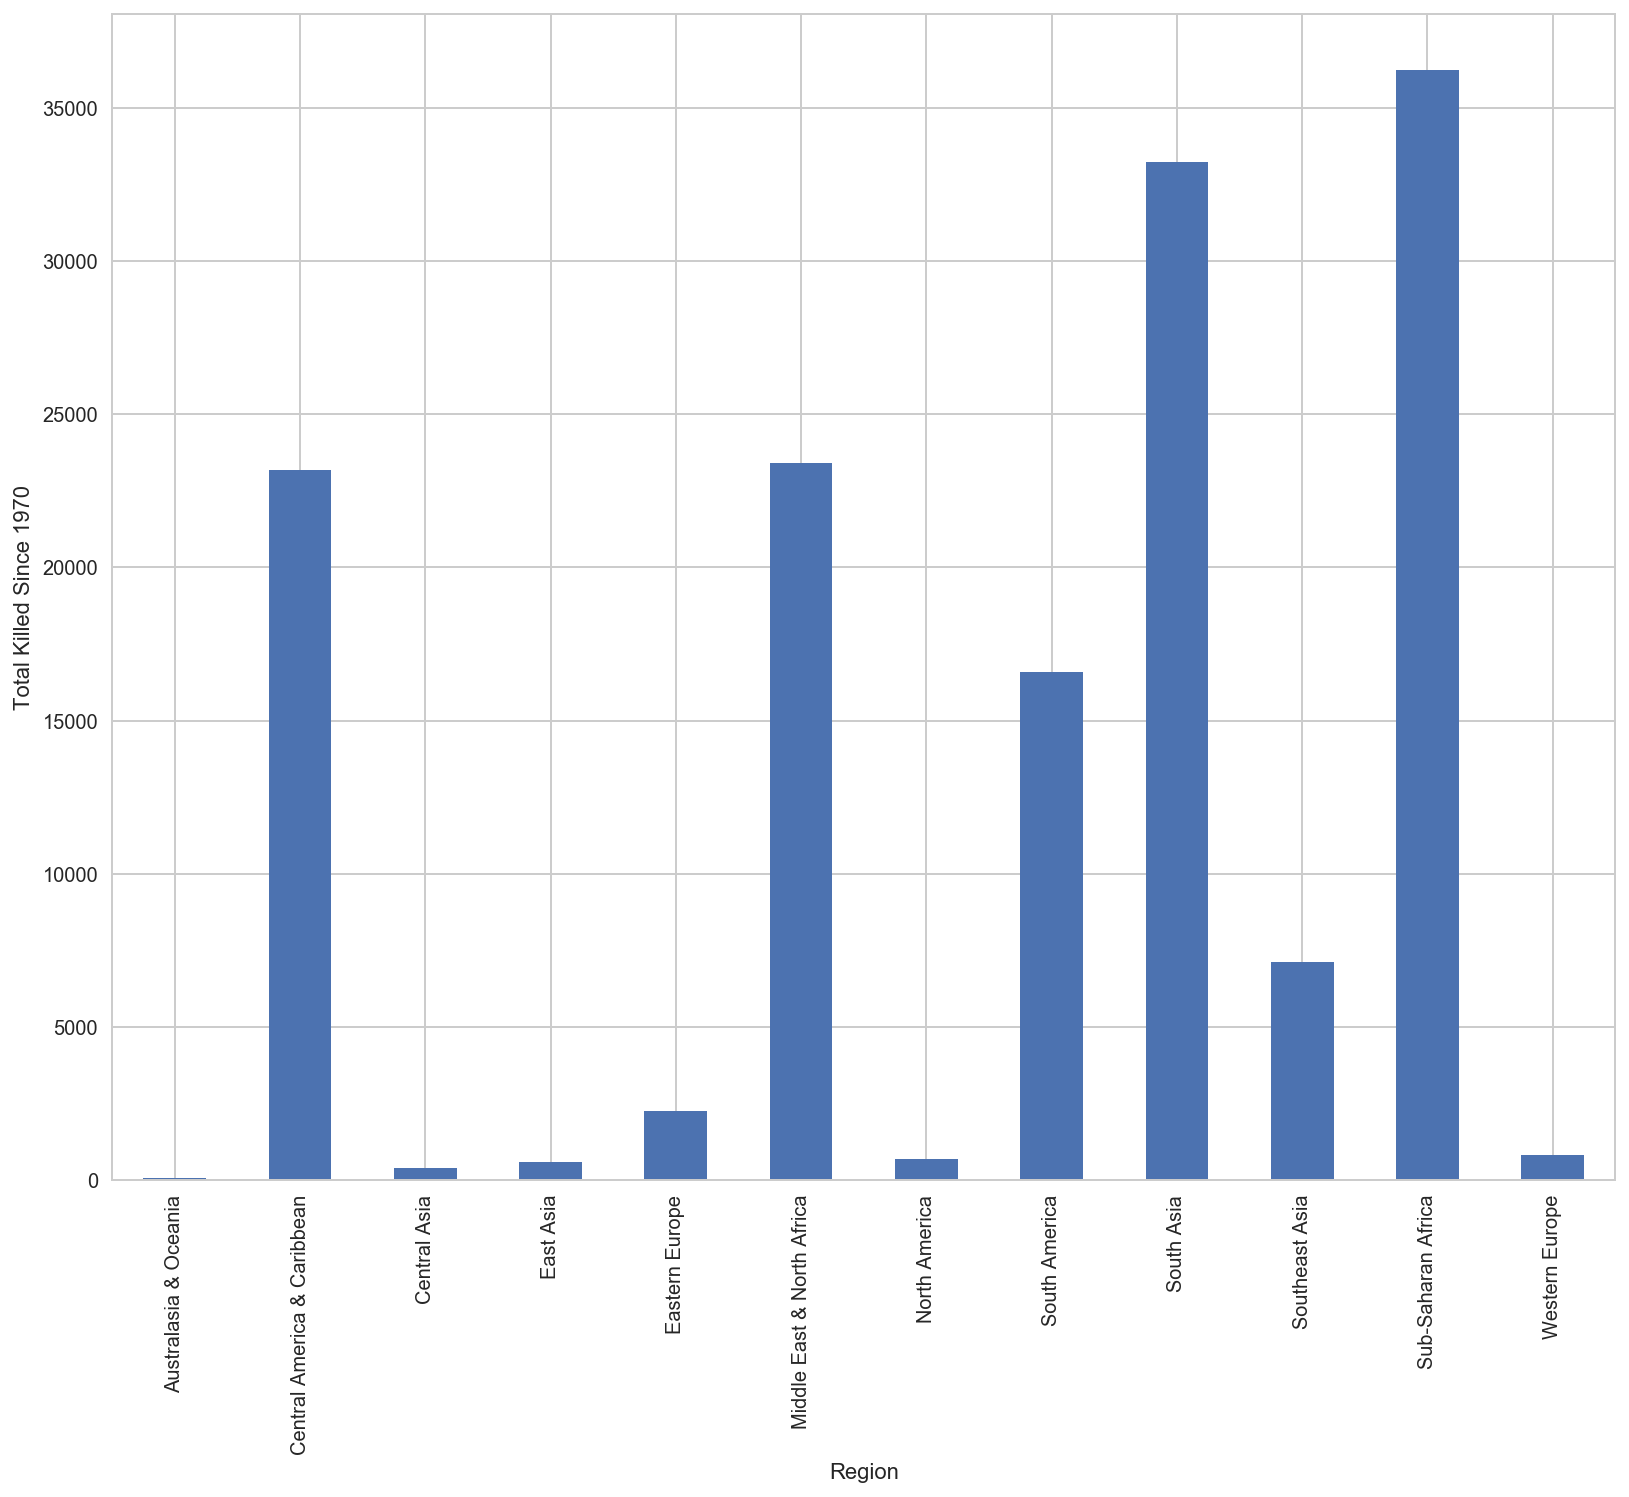

In [32]:
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 17
attack_dfs['Armed Assault'].groupby('region_txt').nkill.sum().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Total Killed Since 1970')
plt.show()